<a href="https://colab.research.google.com/github/Kenz5n/my_projects/blob/main/Pyq_Programs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. The population of a city in a census taken once in ten years is given
below. Estimate the population in the years 1925, 1975 and 1984.
Year:                   1921 1931 1941 1951 1961 1971 1981
Population in thousands: 35   42   58   84   120  165  220

In [ ]:
import numpy as np

# Function to generate forward difference table
def forward_difference_table(y_values):
    n = len(y_values)
    table = np.zeros((n, n))
    table[:, 0] = y_values  # Fill the first column with y-values

    for col in range(1, n):
        for row in range(n - col):
            table[row][col] = table[row + 1][col - 1] - table[row][col - 1]
    return table

# Function to calculate factorial
def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)

# Newton's Forward Interpolation
def newton_forward_interpolation(x_values, y_values, x_to_find):
    n = len(x_values)
    h = x_values[1] - x_values[0]  # Assumption: uniform spacing
    u = (x_to_find - x_values[0]) / h

    table = forward_difference_table(y_values)
    result = y_values[0]

    for i in range(1, n):
        u_product = 1
        for j in range(i):
            u_product *= (u - j)
        result += (u_product * table[0][i]) / factorial(i)

    return result

# Data
x_values = np.array([1921, 1931, 1941, 1951, 1961, 1971, 1981])
y_values = np.array([35, 42, 58, 84, 120, 165, 220])

# Years to estimate population
years_to_estimate = [1925, 1975, 1984]

# Estimate populations
for year in years_to_estimate:
    estimated_population = newton_forward_interpolation(x_values, y_values, year)
    print(f"Estimated population in {year}: {estimated_population:.2f} thousand")


Estimated population in 1925: 36.76 thousand
Estimated population in 1975: 185.56 thousand
Estimated population in 1984: 239.45 thousand


Q2. A rocket is launched from the ground. Its acceleration measured every
5 seconds is tabulated below. Find the velocity and the position of the
rocket at t = 40 seconds.
t :    0   5     10    15    20    25    30    35   40
a(t): 40 45.25 48.50 51.25 54.35 59.48 61.50 64.30 68.70



In [ ]:
# Function to calculate integration using the Trapezoidal Rule
def trapezoidal_rule(x_values, y_values):
    n = len(x_values)
    integral = 0.0
    for i in range(n - 1):
        h = x_values[i + 1] - x_values[i]
        integral += (y_values[i] + y_values[i + 1]) * h / 2.0
    return integral

# Main program
# Data: Time (t) and Acceleration (a(t))
t_values = [0, 5, 10, 15, 20, 25, 30, 35, 40]
a_values = [40, 45.25, 48.50, 51.25, 54.35, 59.48, 61.50, 64.30, 68.70]

# Step 1: Compute velocity using the Trapezoidal Rule
# Initial velocity (v0) = 0 (assuming rocket starts from rest)
velocity_values = [0.0]  # Start with initial velocity
for i in range(1, len(t_values)):
    velocity = trapezoidal_rule(t_values[:i + 1], a_values[:i + 1])
    velocity_values.append(velocity)

# Velocity at t = 40 seconds
v_40 = velocity_values[-1]

# Step 2: Compute position using the Trapezoidal Rule
# Initial position (s0) = 0 (rocket starts from the ground)
position_values = [0.0]  # Start with initial position
for i in range(1, len(t_values)):
    position = trapezoidal_rule(t_values[:i + 1], velocity_values[:i + 1])
    position_values.append(position)

# Position at t = 40 seconds
s_40 = position_values[-1]

# Output results
print("Velocity of the rocket at t = 40 seconds: {:.2f} m/s".format(v_40))
print("Position of the rocket at t = 40 seconds: {:.2f} m".format(s_40))






Velocity of the rocket at t = 40 seconds: 2194.90 m/s
Position of the rocket at t = 40 seconds: 40357.88 m


In [ ]:
import numpy as np
t = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40])  # Time (seconds)
a = np.array([40, 45.25, 48.50, 51.25, 54.35, 59.48, 61.50, 64.30, 68.70])  # Acceleration (m/s^2)

v = np.zeros(len(t))  # Initialize velocity array
v[0] = 0  # Initial velocity is 0

# We use the Trapezoidal rule here to approximate the integral of acceleration to find velocity.
for i in range(1, len(t)):
  v[i] = v[i - 1] + 0.5 * (a[i - 1] + a[i]) * (t[i] - t[i - 1])

s = np.zeros(len(t))  # Initialize position array
s[0] = 0  # Initial position is 0

# We apply the Trapezoidal rule again to integrate velocity and find position.
for i in range(1, len(t)):
  s[i] = s[i - 1] + 0.5 * (v[i - 1] + v[i]) * (t[i] - t[i - 1])

velocity_at_40 = v[-1]  # Velocity at the last time point (t = 40)
position_at_40 = s[-1]  # Position at the last time point (t = 40)

print("Velocity at t = 40 seconds:", velocity_at_40, "m/s")
print("Position at t = 40 seconds:", position_at_40, "m")

Velocity at t = 40 seconds: 2194.9 m/s
Position at t = 40 seconds: 40357.875 m


Q3. Compute the following integral by probabilistic method (Monte Carlo
Integration): limit 0 to 5 integral e^(-x^2) dx.

In [ ]:
import numpy as np

# Define the function to integrate:
def f(x):
  return np.exp(-x**2)

# Define the integration limits:
a = 0 # lower limit
b = 5 # upper limit

# Generate random samples:
n=10000  # Number of random samples
x_rand = np.random.uniform(a,b,n)  # Generate N random numbers between a and b

# Evaluate the function at random points:
y_rand = f(x_rand)

# Estimate the integral:
integral_estimate = (b-a)*np.mean(y_rand)

# Print the result:
print("Estimated integral:", integral_estimate)







Estimated integral: 0.8740411123361833


Q4. consider the 5D values of the error function f(x)= er f x = (2/ root pi ) limit 0 to x integral e^(-omega^2) domega namely f(0.25)=0.27633, f(0.5)=0.52050, f(1)= 0.84270. compute f(0.75) using suitable interpolation method.

In [ ]:
import numpy as np

# Define the Lagrange Interpolation Formula:
def lagrange_interpolation(x_values,y_values,x_to_find):

  n = len(x_values)
  result = 0.0

  for i in range(n):
      term = y_values[i]
      for j in range (n):
          if i != j :
             term *= (x_to_find - x_values[j]) / ( x_values[i] - x_values[j])
      result += term
  return result

# nput the data:
x_values = np.array([0.25,0.5,1])
y_values = np.array([0.27633,0.52050,0.84270])
x_to_find = 0.75

# Call the interpolation function:
value = lagrange_interpolation(x_values,y_values,x_to_find)

# Print the result:
print(f"f({x_to_find}) = {value:.5f}")



f(0.75) = 0.70929


Q1(sec b). Calculate the most probable speed of a Maxwellian velocity distribution
(unnormalised) P(v) = v^2.e^(-v^2)
of the particle by using central difference
formula of numerical differentiation using δv = 0.1.

In [ ]:
import numpy as np


def p(v) :

  return v**2 * np.exp(-v**2)



def central_difference (v, delta_v):

  return ( (p(v + delta_v) - p(v - delta_v)) / (delta_v * 2) )

v = 1
delta_v = 0.1

while  abs( central_difference ( v, delta_v)) > 1e-10 :
  v -= central_difference ( v, delta_v) * 1.0

print(f" probable speed is : {v:.4f}")


 probable speed is : 0.0000


Q2(sec b). Estimate the first derivative of f(x) = -x^(4)-1.5x^(3)-5x^(2)-2.5x^(2)+12 at
x = 0.5 using forward and central difference methods with a step size
h = 0.5 in the x-range of 0 to 1 . Calculate errors for each methods

In [ ]:
import numpy as np

def f(x):

  return (-x**4) - (1.5*(x**3)) - (5*(x**2)) - (2.5*(x**2)) + 12

def exact_derivative(x):

  return (-4*(x**3)) - (4.5*(x**2)) - (10*x) - (5*x)

x = 0.5
h = 0.5

forward_derivative = (f(x + h) - f(x)) / h
central_derivative = (f(x + h) - f(x - h)) / (2 * h)
ext_derivative = exact_derivative(x)

forward_error = abs(forward_derivative - ext_derivative)
central_error = abs(central_derivative - ext_derivative)

print(f"forward difference derivative : {forward_derivative:.4f}")
print(f"Central difference derivative: {central_derivative:.4f}")
print(f"Exact derivative: {ext_derivative:.4f}")
print(f"Forward difference error: {forward_error:.4f}")
print(f"Central difference error: {central_error:.4f}")





forward difference derivative : -15.7500
Central difference derivative: -10.0000
Exact derivative: -9.1250
Forward difference error: 6.6250
Central difference error: 0.8750


Q3(sec b). Solve the simultaneous differential equations
dy/dt+2x=e^(t)
dx/dy-2y=1+t
given that x(t = 0) = 1 and y(t = 0) = 2 in the interval x = [0, 10]
using RK4 method. Plot the solution.

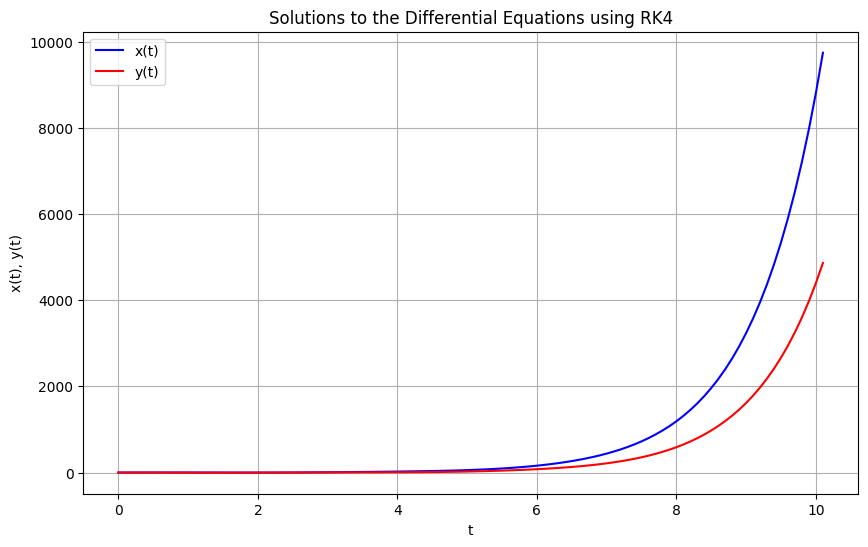

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def dydt(t,x,y):
  return np.exp(t)-(2*x)

def dxdt(t,x,y):
  return 1+t+(2*y)

# RK4 method implementation
def rk4(f1,f2,t0,x0,y0,t_end,h):
  t_values=[t0]
  x_values=[x0]
  y_values=[y0]

  t=t0
  x=x0
  y=y0
  while t<t_end:
    # Compute RK4 for y
    k1_y = h*f1(t, x ,y)
    k1_x = h*f2(t, x, y)

    k2_y = h * f1(t+h/2, x+k1_x/2, y+k1_y/2)
    k2_x = h * f2(t+h/2, x+k1_x/2, y+k1_y/2)

    k3_y = h * f1(t+h/2, x+k2_x/2, y+k2_y/2)
    k3_x = h * f2(t+h/2, x+k2_x/2, y+k2_y/2)

    k4_y = h * f1(t+h, x+k3_x, y+k3_y)
    k4_x = h * f2(t+h, x+k3_x, y+k3_y)

    y += (k1_y + 2*k2_y + 2*k3_y + k4_y)/6
    x += (k1_x + 2*k2_x + 2*k3_x + k4_x)/6
    t += h
    t_values.append(t)
    x_values.append(x)
    y_values.append(y)

  return t_values,x_values,y_values

# Initial conditions and parameters
t0=0
y0=2
x0=1
t_end=10
h=0.1

# Solve the system
t_values, x_values, y_values = rk4 (dydt,dxdt,t0,x0,y0,t_end,h)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(t_values, x_values, label="x(t)", color="blue")
plt.plot(t_values, y_values, label="y(t)", color="red")
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.title("Solutions to the Differential Equations using RK4")
plt.legend()
plt.grid()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def dydt(t, x, y):
    return np.exp(t) - 2 * x

def dxdt(t, x, y):
    return 1 + t + 2 * y

# RK4 method implementation
def rk4_system(f1, f2, t0, x0, y0, t_end, h):
    t_values = [t0]
    x_values = [x0]
    y_values = [y0]

    t = t0
    x = x0
    y = y0

    while t < t_end:
        # Compute RK4 for y
        k1_y = h * f1(t, x, y)
        k1_x = h * f2(t, x, y)

        k2_y = h * f1(t + h / 2, x + k1_x / 2, y + k1_y / 2)
        k2_x = h * f2(t + h / 2, x + k1_x / 2, y + k1_y / 2)

        k3_y = h * f1(t + h / 2, x + k2_x / 2, y + k2_y / 2)
        k3_x = h * f2(t + h / 2, x + k2_x / 2, y + k2_y / 2)

        k4_y = h * f1(t + h, x + k3_x, y + k3_y)
        k4_x = h * f2(t + h, x + k3_x, y + k3_y)

        y += (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6
        x += (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        t += h

        t_values.append(t)
        x_values.append(x)
        y_values.append(y)

    return t_values, x_values, y_values

# Initial conditions and parameters
t0 = 0
x0 = 1
y0 = 2
t_end = 10
h = 0.1

# Solve the system
t_values, x_values, y_values = rk4_system(dydt, dxdt, t0, x0, y0, t_end, h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label="x(t)", color="blue")
plt.plot(t_values, y_values, label="y(t)", color="red")
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.title("Solutions to the Differential Equations using RK4")
plt.legend()
plt.grid()
plt.show()